In [1]:
session = '2025.01.09'

In [2]:
from pathlib import Path
import numpy as np

dataDir = Path('Data/BG', session)
X = np.load(dataDir / 'data.npz')['X']
y = np.load(dataDir / 'data.npz')['y']

print('X shape:', X.shape)
print('Cues:', y)

# Change the labels to range(0, num_classes)
label_mapping = {label: i for i, label in enumerate(set(y.tolist()))}
y = [label_mapping[label.item()] for label in y]

print(y)

X shape: (217, 99, 512)
Cues: [5 5 0 5 3 3 0 0 3 0 5 3 3 5 0 3 5 0 0 5 3 5 0 3 3 3 5 5 0 5 0 5 0 3 3 0 3
 0 5 0 3 5 3 5 0 3 0 3 5 3 5 0 5 5 3 0 5 5 3 0 0 5 5 3 3 3 0 0 3 3 5 0 5 5
 0 0 5 5 0 3 5 5 3 3 3 5 3 0 5 0 0 5 0 5 0 3 3 3 5 0 5 0 3 3 0 0 5 3 3 5 5
 5 0 0 3 0 5 3 3 5 0 5 5 0 5 3 0 3 3 5 3 0 5 0 0 5 5 0 5 5 3 5 5 0 5 0 0 3
 0 3 3 3 5 0 3 5 3 0 5 0 5 5 5 0 0 5 5 3 3 0 3 3 5 0 0 5 3 3 0 3 5 5 0 3 3
 0 5 5 3 0 5 5 0 3 3 5 0 0 0 0 3 5 5 5 3 3 5 0 3 5 0 3 0 0 3 5 3]
[2, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2, 

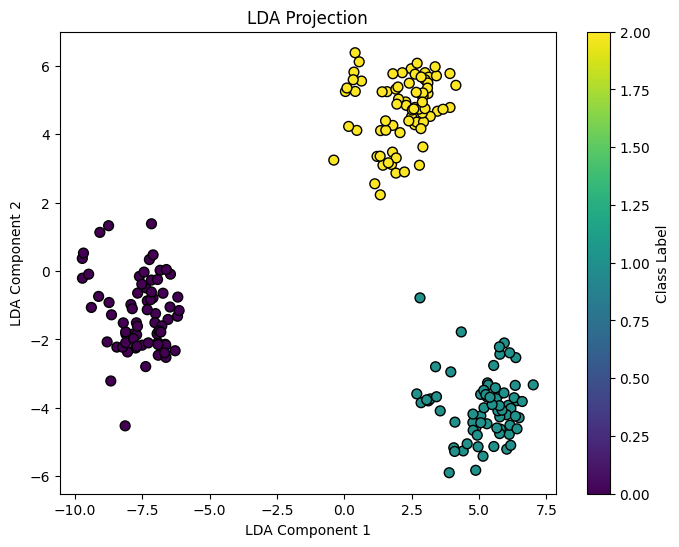

In [3]:
# Plot LDA for data
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(np.mean(X, axis=1), y)

from utils import plot_lda
plot_lda(X_lda, y)